## Test SiameseNet Data Loader

#### Load dataloader

In [1]:
from siamese_net.data_loader import SiameseImageLoader
dataset_path = '/home/rauf/datasets/road_signs/road_signs_separated/'
input_shape=(48, 48, 3)
batch_size = 8

loader = SiameseImageLoader(dataset_path, input_shape=input_shape)

### Test semi hard mining process

In [10]:
from siamese_net.model import SiameseNet
model = SiameseNet('configs/road_signs_simple2_merged_dataset.yml')
# model.load_model('weights/road_signs/best_model_simple2_merged.h5')
data, targets = loader.get_batch_triplets_mining(model.base_model,4,4)

Base model summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_16 (Batc (None, 44, 44, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 22, 32)        12

#### Test pairs dataloader

In [ ]:
data, targets = loader.get_batch_pairs(batch_size=8)
loader.plot_batch(data, targets)

#### Test triplets dataloader

In [ ]:
data, targets = loader.get_batch_triplets(batch_size=8)
loader.plot_batch(data, targets)

#### Test triplets dataloader with negative mining techniques

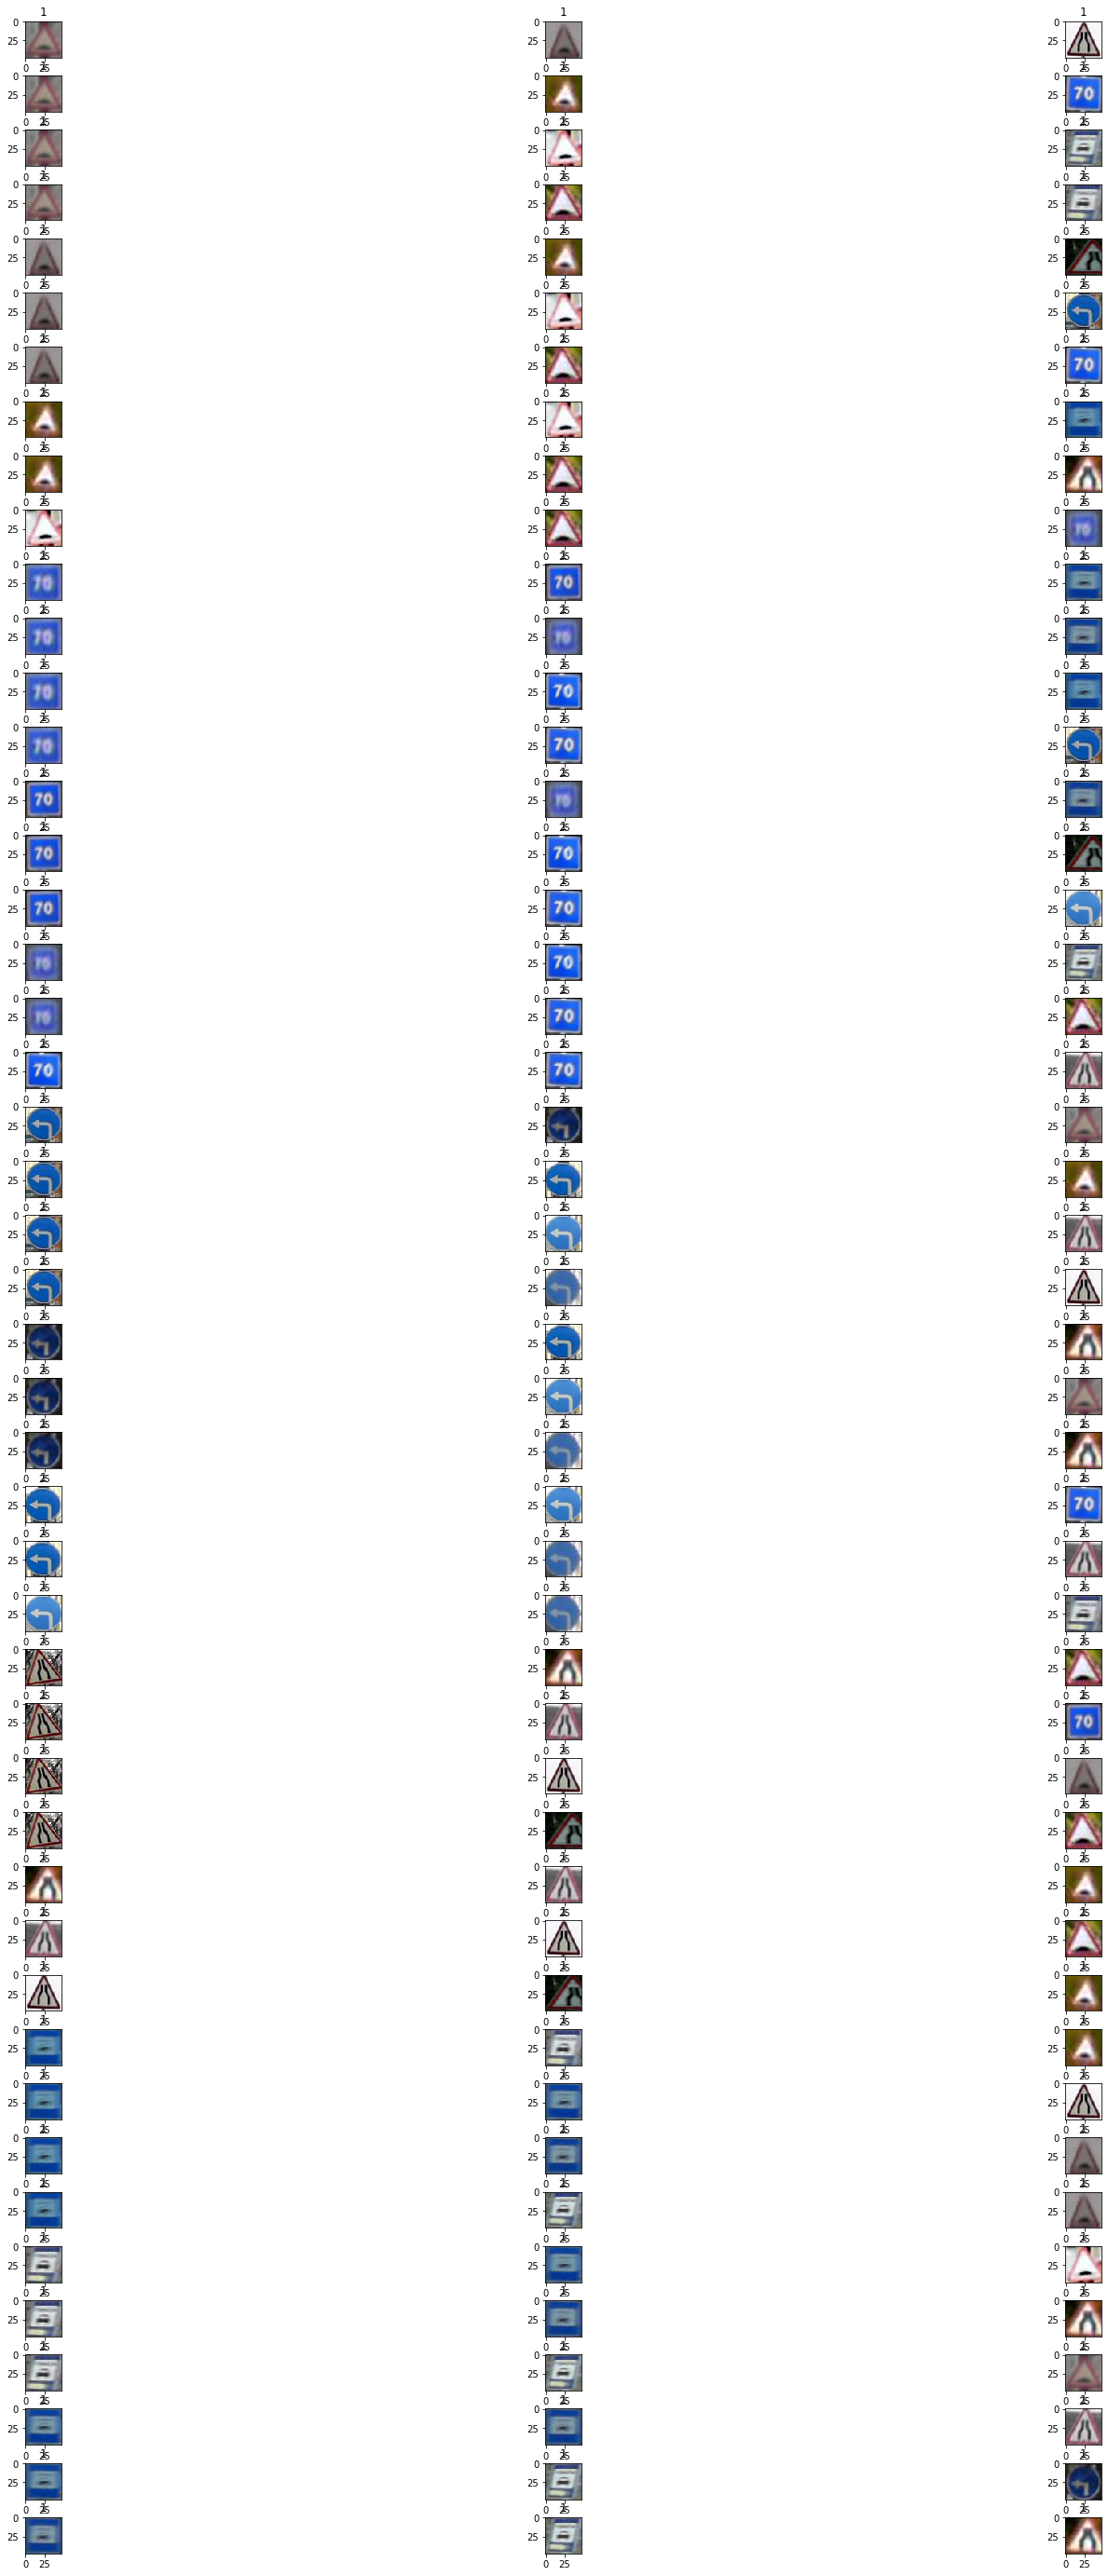

In [11]:
data, targets = loader.get_batch_triplets_mining(model.base_model,5,5)
loader.plot_batch(data, targets)

## Test trained network

#### Load network

In [1]:
from siamese_net.model import SiameseNet
import time

config_name = 'road_signs_resnet18_merged_dataset'
model = SiameseNet('configs/{}.yml'.format(config_name))
model.load_model('weights/road_signs/best_model_resnet18_merged.h5')
model.generate_encodings(save_file_name='encodings_{}.pkl'.format(config_name),
                         max_num_samples_of_each_classes=30, shuffle=True)
# model.load_encodings('encodings/road_signs/encodings_{}.pkl')

Using TensorFlow backend.
W0907 11:38:49.102239 139625495914240 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0907 11:38:49.103974 139625495914240 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0907 11:38:49.122989 139625495914240 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0907 11:38:49.123857 139625495914240 deprecation_wrapper.py:119] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-pa

Base model summary
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 48, 48, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 54, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 24, 24, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________

W0907 11:39:05.863340 139625495914240 deprecation.py:323] From /home/rauf/anaconda3/envs/plates-competition/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Test model on a single image

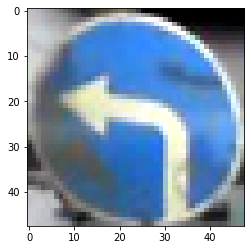

4_1_3
0.00625300407409668


In [7]:
import matplotlib.pyplot as plt 
import cv2
import time
img_path = '/home/rauf/datasets/road_signs/road_signs_separated/train/4_1_3/rtsd-r1_test_005272.png'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(img)
plt.show()

start = time.time()
prediction = model.predict_knn(img_path)[0]
end = time.time()
print(prediction)
print(end - start)

#### Calculate model accuracy on validation set

In [3]:
model_accuracy = model.calculate_prediction_accuracy()
print('Model accuracy on validation set: {}'.format(model_accuracy))

Model accuracy on validation set: 0.9591002044989775


#### Plot t-SNE

In [4]:
from siamese_net.utils import plot_tsne_interactive

plot_tsne_interactive(encodings_path='{}encodings_{}.pkl'.format(model.encodings_path,config_name))

#### Generate submission file

In [ ]:
import pandas as pd
import os

d = {'id':[],
     'label':[]}
for root, dirs, files in os.walk('../dataset/test/'):
    for f in files:
        if f.endswith('.jpg') or f.endswith('.png'):
            prediction = model.predict('../dataset/test/{}'.format(f))
            id_num = int(f.split('.')[0])
            d['id'].append(id_num)
            d['label'].append(prediction)

df = pd.DataFrame(data=d)
df.to_csv('sub.csv', index=False)